In [ ]:
#Decay Width Formula from Martin Wolfgang Winkler Paper

In [ ]:
#Leptonic Width (MW Winkles Paper)
#Code where the formula breaks down as m_phi approaches m_mu and m_B. 
#Lifetime obtained from decay width in seconds, then it is converted in mm/c 
##Pythia8 takes lifetime in mm/c while adding the properties of new particle


In [1]:
##Properties of the Dark Higgs Boson 
## Lifetime(s), Branching Fraction, and Number of events calculation to be used in Pythia8 simulations
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker    

m_u = 0.1057  # mass of muon in GeV
G_fermi = 1.1663787e-5  # Fermi constant in GeV^-2
sin2_theta = 10e-10 # Square of the mixing angle 

def dark_higgs_leptonic_width(m_phi, m_u):
    prefactor = (1 / np.pi) * (1/ (4 * np.sqrt(2)))
    coupling = (sin2_theta) * (G_fermi) * (m_u ** 2) * (m_phi) 
    return prefactor * coupling * (1 - (4 * m_u ** 2 / m_phi ** 2)) ** (3 / 2)

# Range of mass values
# Define the start and end points as integers (e.g., 4 instead of 4.0)
start = 4
end = 42  # Adjusted to account for the decimal increment
step = 2  # Adjusted to account for the decimal increment

# Create the mass_range by dividing by 10.0 to get the desired decimal increments
mass_range = np.arange(start, end, step) / 10.0
# Add the additional mass values
mass_range = np.concatenate((mass_range, [0.212, 4.17]))

# Sort the mass values in ascending order
mass_range.sort()

# Calculate the decay width for each mass value
decay_widths = [dark_higgs_leptonic_width(m_phi, m_u) for m_phi in mass_range]

# Plotting
#fig, ax = plt.subplots()
#ax.plot(mass_range, decay_widths)

# Set y-axis scale to logarithmic
#ax.set_yscale('log')

# Format y-axis tick labels as powers of 10
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'1e{int(np.log10(y))}'))

#plt.xlabel('Mass of Dark Higgs boson (GeV)')
#plt.ylabel(r'Decay Width ($\Gamma$) / $\sin^2\theta$ (GeV)')
#plt.title('Decay Width of Dark Higgs boson into Muons')
#plt.grid(True)
#plt.show()

hbar = 6.582119569e-25 #in GeV.s

# Convert decay widths to lifetimes
lifetimes = [hbar / decay_width for decay_width in decay_widths] #in seconds

# Speed of light in mm/s
c_mm_per_s = 299792458 * 1000  # Speed of light in mm/s

# Convert lifetimes to millimeters per speed of light
lifetimes_mm_per_c = [lifetime * c_mm_per_s for lifetime in lifetimes] #in mm/c(to be used in pythia as nominal lifetime)

# Function to calculate branching fraction for B -> Xs phi
def calculate_branching_fraction(m_phi, m_b, sin2_theta):
    return 6.2 * (1 - (m_phi**2 / m_b**2)) * sin2_theta

# Mass of the bottom quark in GeV
m_b = 4.18

# Calculate branching fractions for each mass value
branching_fractions = [calculate_branching_fraction(m_phi, m_b, sin2_theta) for m_phi in mass_range]

# Function to calculate the Number of events
def calculate_number_of_events(branching_fraction):
    return (3575 * 10**11) * branching_fraction

# Calculate the Number of events for each mass
events = [calculate_number_of_events(branching_fraction) for branching_fraction in branching_fractions]

# Print the lifetimes, branching fractions, and Number of events
for i, m_phi in enumerate(mass_range):
    print(f"Mass: {m_phi} GeV, Lifetime: {lifetimes_mm_per_c[i]} mm/c, B_M Branching Fraction: {branching_fractions[i]}, Number of Events: {events[i]}")

Mass: 0.212 GeV, Lifetime: 298703521.81864434 mm/c, B_M Branching Fraction: 6.184051830315241e-09, Number of Events: 2210798.5293376986
Mass: 0.4 GeV, Lifetime: 109961.60643003893 mm/c, B_M Branching Fraction: 6.143224743023283e-09, Number of Events: 2196202.8456308236
Mass: 0.6 GeV, Lifetime: 54716.40792636973 mm/c, B_M Branching Fraction: 6.072255671802386e-09, Number of Events: 2170831.402669353
Mass: 0.8 GeV, Lifetime: 37496.1726967733 mm/c, B_M Branching Fraction: 5.97289897209313e-09, Number of Events: 2135311.382523294
Mass: 1.0 GeV, Lifetime: 28820.74907288298 mm/c, B_M Branching Fraction: 5.845154643895515e-09, Number of Events: 2089642.7851926466
Mass: 1.2 GeV, Lifetime: 23511.383781046337 mm/c, B_M Branching Fraction: 5.689022687209542e-09, Number of Events: 2033825.6106774113
Mass: 1.4 GeV, Lifetime: 19898.448750853746 mm/c, B_M Branching Fraction: 5.50450310203521e-09, Number of Events: 1967859.8589775877
Mass: 1.6 GeV, Lifetime: 17269.288949804748 mm/c, B_M Branching Frac

In [ ]:
#Branching fraction for Dark Higgs Decaying to muons as read from the diagram in FRASER's and ref{Winkler} paper
#0.212 -> 0.9
#0.4 -> 0.13
#0.6 -> 0.07
#0.8 -> 0.04
#1 -> 0.0038
#1.2 -> 0.01
#1.4 -> 0.02
#1.6 -> 0.07
#1.8 -> 0.13
#2.0 -> 0.125
#2.2 -> 0.118
#2.4 -> 0.116
#2.6 -> 0.1
#2.8 -> 0.09
#3.0 -> 0.082
#3.2 -> 0.08
#3.4 -> 0.07
#3.6 -> 0.06
#3.8 -> 0.004
#4.0 -> 0.0034
#4.17 -> 0.0032


In [ ]:
#Calculation of lifetime in seconds, error at the decay limit

/var/folders/_g/62t1l2g52x91vgmwzmp7q46r0000gn/T/ipykernel_5432/3652983681.py:11: RuntimeWarning: invalid value encountered in double_scalars
  return prefactor * coupling * (1 - (4 * m_u ** 2 / m_phi ** 2)) ** (3 / 2)
/var/folders/_g/62t1l2g52x91vgmwzmp7q46r0000gn/T/ipykernel_5432/3652983681.py:30: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 5)


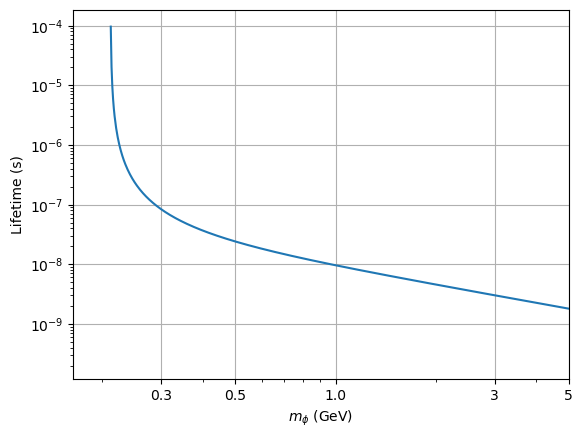

In [75]:
import numpy as np
import matplotlib.pyplot as plt

m_u = 0.1057  # mass of muon in GeV
G_fermi = 1.1663787e-5  # Fermi constant in GeV^-2
sin2_theta = 1e-8  # Square of the mixing angle

def dark_higgs_leptonic_width(m_phi, m_u):
    prefactor = (1 / np.pi) * (1 / (4 * np.sqrt(2)))
    coupling = sin2_theta * G_fermi * (m_u ** 2) * m_phi
    return prefactor * coupling * (1 - (4 * m_u ** 2 / m_phi ** 2)) ** (3 / 2)

# Range of mass values in logarithmic scale
mass_range = np.logspace(np.log10(0.2), np.log10(40), 1000)

# Calculate the decay width for each mass value
decay_widths = [dark_higgs_leptonic_width(m_phi, m_u) for m_phi in mass_range]

# Convert decay widths to lifetimes
hbar = 6.582119569e-25  # in GeV.s
lifetimes = [hbar / decay_width for decay_width in decay_widths]  # in seconds

# Plotting
plt.plot(mass_range, lifetimes)
plt.xscale('log')  # Set x-axis scale to logarithmic
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.xlabel('Mass of Dark Higgs boson (GeV)')
plt.ylabel('Lifetime (s)')
plt.xlabel('$m_\phi$ (GeV)')
plt.xlim(0, 5)
#plt.ylim(1e-10, 1e-5)
# Ticks for X-axis
major_x_ticks = [0.3, 0.5, 1.0, 3, 5]
# Set the X-axis major ticks and labels
plt.xticks(major_x_ticks, [f'{tick}' for tick in major_x_ticks])

plt.grid(True)
plt.show()


In [ ]:
##Decay Rate (GeV) of Dark Higgs decaying to muons, error at the decay limit

/var/folders/_g/62t1l2g52x91vgmwzmp7q46r0000gn/T/ipykernel_40236/4262278141.py:11: RuntimeWarning: invalid value encountered in double_scalars
  return prefactor * coupling * (1 - (4 * m_u ** 2 / m_phi ** 2)) ** (3 / 2)
/var/folders/_g/62t1l2g52x91vgmwzmp7q46r0000gn/T/ipykernel_40236/4262278141.py:31: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 5)


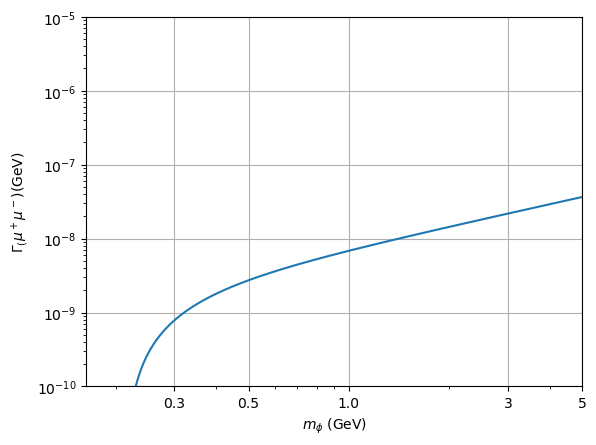

In [7]:
import numpy as np
import matplotlib.pyplot as plt

m_u = 0.1057  # mass of muon in GeV
G_fermi = 1.1663787e-5  # Fermi constant in GeV^-2
sin2_theta = 1  # Square of the mixing angle

def dark_higgs_leptonic_width(m_phi, m_u):
    prefactor = (1 / np.pi) * (1 / (4 * np.sqrt(2)))
    coupling = sin2_theta * G_fermi * (m_u ** 2) * m_phi
    return prefactor * coupling * (1 - (4 * m_u ** 2 / m_phi ** 2)) ** (3 / 2)

# Range of mass values in logarithmic scale
mass_range = np.logspace(np.log10(0.2), np.log10(40), 1000)

# Calculate the decay width for each mass value
decay_widths = [dark_higgs_leptonic_width(m_phi, m_u) for m_phi in mass_range]

# Convert decay widths to lifetimes
hbar = 6.582119569e-25  # in GeV.s
lifetimes = [hbar / decay_width for decay_width in decay_widths]  # in seconds

# Plotting
plt.plot(mass_range, decay_widths)
plt.xscale('log')  # Set x-axis scale to logarithmic
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.xlabel('$m_\phi$ (GeV)')
plt.ylabel(r'$\Gamma_(\mu^+\mu^-)$(GeV)')
#plt.title('Lifetime of Dark Higgs boson into Muons (log-log plot)')

plt.xlim(0, 5)
plt.ylim(1e-10, 1e-5)
# Ticks for X-axis
major_x_ticks = [0.3, 0.5, 1.0, 3, 5]
# Set the X-axis major ticks and labels
plt.xticks(major_x_ticks, [f'{tick}' for tick in major_x_ticks])

plt.grid(True)
plt.show()


In [ ]:
# Lifetime for phi -> tau+ tau-

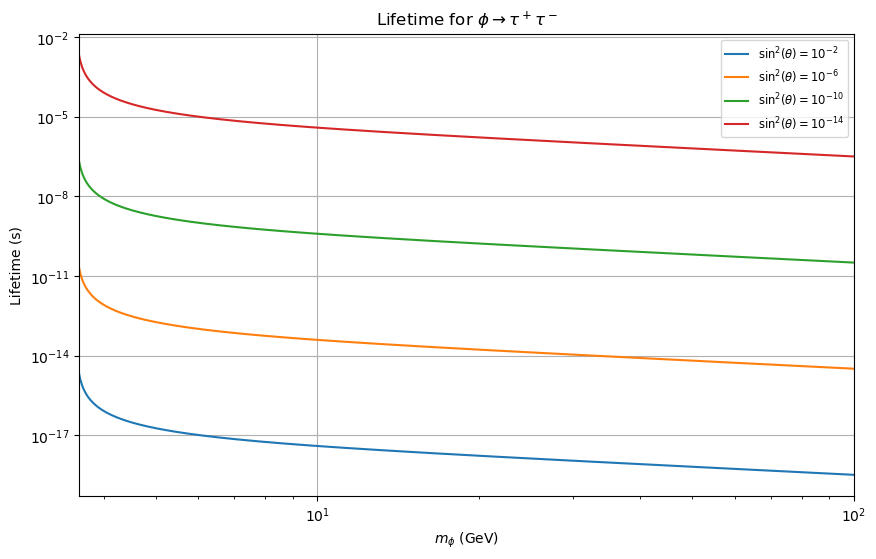

In [34]:
import numpy as np
import matplotlib.pyplot as plt

m_tau = 1.77686  # mass of tau in GeV
G_fermi = 1.1663787e-5  # Fermi constant in GeV^-2
speed_of_light = 299792458  # speed of light in m/s

# Different values for sin^2(theta)
sin2_theta_values = [1e-2, 1e-6, 1e-10, 1e-14]

plt.figure(figsize=(10, 6))

for sin2_theta in sin2_theta_values:
    def dark_higgs_leptonic_width(m_phi, m_tau):
        prefactor = (1 / np.pi) * (1 / (4 * np.sqrt(2)))
        coupling = sin2_theta * G_fermi * (m_tau ** 2) * m_phi
        return prefactor * coupling * (1 - (4 * m_tau ** 2 / m_phi ** 2)) ** (3 / 2)

    # Range of mass values in logarithmic scale
    mass_range = np.logspace(np.log10(3.6), np.log10(100), 1000)

    # Calculate the decay width for each mass value
    decay_widths = [dark_higgs_leptonic_width(m_phi, m_tau) for m_phi in mass_range]

    # Convert decay widths to lifetimes
    hbar = 6.582119569e-25  # in GeV.s
    lifetimes = [hbar / decay_width for decay_width in decay_widths]  # in seconds

    # Convert lifetimes to decay distances
    #decay_distances = [speed_of_light * lifetime for lifetime in lifetimes]  # in meters

    # Plotting
    plt.plot(mass_range,lifetimes, label=f'$\\sin^2(\\theta) = 10^{{{int(np.log10(sin2_theta))}}}$')
 
plt.xscale('log')  # Set x-axis scale to logarithmic
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.xlabel('$m_\phi$ (GeV)')
plt.ylabel('Lifetime (s)')
plt.title('Lifetime for $\phi \\rightarrow \\tau^+ \\tau^-$')
plt.xlim(3.6, 100)
plt.legend(fontsize='small')
plt.grid(True)
plt.show()


In [ ]:
#Decay distance for phi -> tau tau


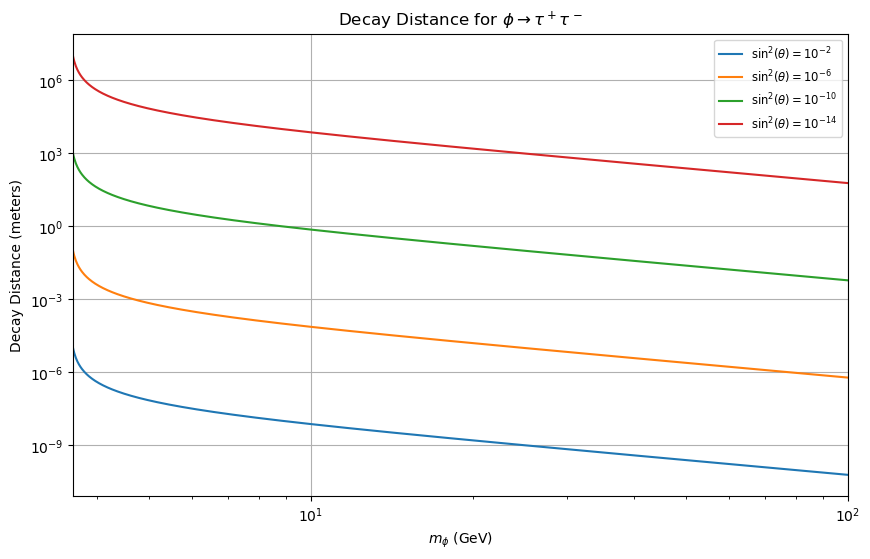

In [46]:
import numpy as np
import matplotlib.pyplot as plt

m_tau = 1.77686  # mass of tau in GeV
G_fermi = 1.1663787e-5  # Fermi constant in GeV^-2
speed_of_light = 299792458  # speed of light in m/s

# Different values for sin^2(theta)
sin2_theta_values = [1e-2, 1e-6, 1e-10, 1e-14]

plt.figure(figsize=(10, 6))

for sin2_theta in sin2_theta_values:
    def dark_higgs_leptonic_width(m_phi, m_tau):
        prefactor = (1 / np.pi) * (1 / (4 * np.sqrt(2)))
        coupling = sin2_theta * G_fermi * (m_tau ** 2) * m_phi
        return prefactor * coupling * (1 - (4 * m_tau ** 2 / m_phi ** 2)) ** (3 / 2)

    # Range of mass values in logarithmic scale
    mass_range = np.logspace(np.log10(3.6), np.log10(100), 1000)

    # Calculate the decay width for each mass value
    decay_widths = [dark_higgs_leptonic_width(m_phi, m_tau) for m_phi in mass_range]

    # Convert decay widths to lifetimes
    hbar = 6.582119569e-25  # in GeV.s
    lifetimes = [hbar / decay_width for decay_width in decay_widths]  # in seconds

    # Convert lifetimes to decay distances
    
    #Assuming mass of B meson to be 5.279 GeV
    mass_SM_Higgs = 125
    decay_distances = [(c * lifetime * mass_SM_Higgs) / (2 * m_phi) for lifetime, m_phi in zip(lifetimes, mass_range)]

    # Plotting
    plt.plot(mass_range,decay_distances, label=f'$\\sin^2(\\theta) = 10^{{{int(np.log10(sin2_theta))}}}$')
 
plt.xscale('log')  # Set x-axis scale to logarithmic
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.xlabel('$m_\phi$ (GeV)')
plt.ylabel('Decay Distance (meters)')
plt.title('Decay Distance for $\phi \\rightarrow \\tau^+ \\tau^-$')
plt.xlim(3.6, 100)
plt.legend(fontsize='small')
plt.grid(True)
plt.show()


In [ ]:
#Lifetime for phi-> ee

/var/folders/_g/62t1l2g52x91vgmwzmp7q46r0000gn/T/ipykernel_60662/665340983.py:12: RuntimeWarning: invalid value encountered in double_scalars
  return prefactor * coupling * (1 - (4 * m_e ** 2 / m_phi ** 2)) ** (3 / 2)


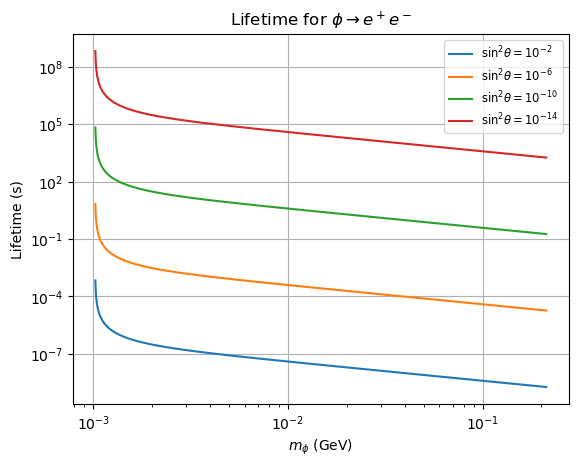

In [41]:
import numpy as np
import matplotlib.pyplot as plt

m_e = 0.0005109989  # mass of electron in GeV
G_fermi = 1.1663787e-5  # Fermi constant in GeV^-2
c = 299792458  # Speed of light in m/s

# Define the function to calculate the dark Higgs leptonic width
def dark_higgs_leptonic_width(m_phi, m_e, sin2_theta):
    prefactor = (1 / np.pi) * (1 / (4 * np.sqrt(2)))
    coupling = sin2_theta * G_fermi * (m_e ** 2) * m_phi
    return prefactor * coupling * (1 - (4 * m_e ** 2 / m_phi ** 2)) ** (3 / 2)

# Range of mass values in logarithmic scale
mass_range = np.logspace(np.log10(0.00102), np.log10(0.212), 1000)

# Values of sin2_theta to consider
sin2_theta_values = [1e-2, 1e-6, 1e-10, 1e-14]

# Plotting decay distance for each sin2_theta value
for sin2_theta_value in sin2_theta_values:
    # Calculate the decay width for each mass value
    decay_widths = [dark_higgs_leptonic_width(m_phi, m_e, sin2_theta_value) for m_phi in mass_range]

    # Convert decay widths to lifetimes
    hbar = 6.582119569e-25  # in GeV.s
    lifetimes = [hbar / decay_width for decay_width in decay_widths]  # in seconds

    # Plotting decay distance
    plt.plot(mass_range, lifetimes, label=f'$\sin^2\\theta = 10^{{{int(np.log10(sin2_theta_value))}}}$')

plt.xscale('log')  # Set x-axis scale to logarithmic
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.xlabel('$m_\phi$ (GeV)')
plt.ylabel('Lifetime (s)')
plt.title('Lifetime for $\phi \\rightarrow e^+ e^-$')
plt.grid(True)

# Adjust legend box size and position
plt.legend(fontsize='small', loc='upper right')

plt.show()


In [ ]:
##Decay Distance for phi-> ee

/var/folders/_g/62t1l2g52x91vgmwzmp7q46r0000gn/T/ipykernel_60662/2956677886.py:11: RuntimeWarning: invalid value encountered in double_scalars
  return prefactor * coupling * (1 - (4 * m_e ** 2 / m_phi ** 2)) ** (3 / 2)


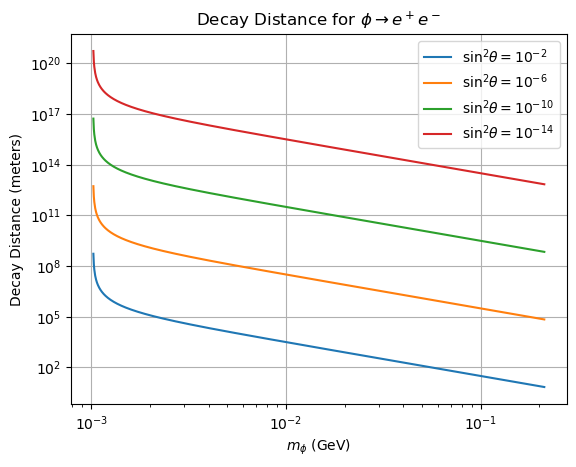

In [42]:
import numpy as np
import matplotlib.pyplot as plt

m_e = 0.0005109989  # mass of electron in GeV
G_fermi = 1.1663787e-5  # Fermi constant in GeV^-2
c = 299792458  # Speed of light in m/s

def dark_higgs_leptonic_width(m_phi, m_e, sin2_theta):
    prefactor = (1 / np.pi) * (1 / (4 * np.sqrt(2)))
    coupling = sin2_theta * G_fermi * (m_e ** 2) * m_phi
    return prefactor * coupling * (1 - (4 * m_e ** 2 / m_phi ** 2)) ** (3 / 2)

# Range of mass values in logarithmic scale
mass_range = np.logspace(np.log10(0.00102), np.log10(0.212), 1000)

# Values of sin2_theta to consider
sin2_theta_values = [1e-2, 1e-6, 1e-10, 1e-14]

# Plotting decay distance for each sin2_theta value
for sin2_theta_value in sin2_theta_values:
    # Calculate the decay width for each mass value
    decay_widths = [dark_higgs_leptonic_width(m_phi, m_e, sin2_theta_value) for m_phi in mass_range]

    # Convert decay widths to lifetimes
    hbar = 6.582119569e-25  # in GeV.s
    lifetimes = [hbar / decay_width for decay_width in decay_widths]  # in seconds

    # Calculate decay distance for each lifetime
    # Assuming mass of B meson to be 5.279 GeV
    mass_b_mesons = 5.279
    decay_distances = [(c * lifetime * mass_b_mesons) / (2 * m_phi) for lifetime, m_phi in zip(lifetimes, mass_range)]

    # Plotting decay distance
    plt.plot(mass_range, decay_distances, label=f'$\\sin^2\\theta = 10^{{{int(np.log10(sin2_theta_value))}}}$')

plt.xscale('log')  # Set x-axis scale to logarithmic
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.xlabel('$m_\phi$ (GeV)')
plt.ylabel('Decay Distance (meters)')
plt.title('Decay Distance for $\phi \\rightarrow e^+ e^-$')
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
# Decay distance ct vs m_phi plot for phi ->m u+ + mu - at sin^2theta = 10^-2, 10 ^ -6, 10^-12

/var/folders/_g/62t1l2g52x91vgmwzmp7q46r0000gn/T/ipykernel_90420/2057983773.py:18: RuntimeWarning: invalid value encountered in double_scalars
  return prefactor * coupling * (1 - (4 * m_u ** 2 / m_phi ** 2)) ** (3 / 2)


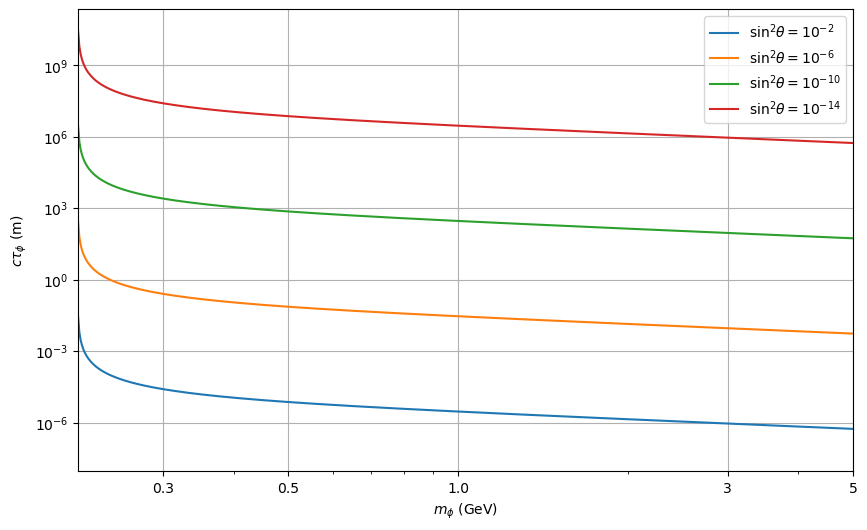

In [39]:
import numpy as np
import matplotlib.pyplot as plt

m_u = 0.1057  # mass of muon in GeV
G_fermi = 1.1663787e-5  # Fermi constant in GeV^-2
speed_of_light = 299792458  # speed of light in m/s

# List of sin2_theta values
sin2_theta_values = [1e-2, 1e-6, 1e-10, 1e-14]

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size

for sin2_theta in sin2_theta_values:
    def dark_higgs_leptonic_width(m_phi, m_u):
        prefactor = (1 / np.pi) * (1 / (4 * np.sqrt(2)))
        coupling = sin2_theta * G_fermi * (m_u ** 2) * m_phi
        return prefactor * coupling * (1 - (4 * m_u ** 2 / m_phi ** 2)) ** (3 / 2)

    # Range of mass values in logarithmic scale
    mass_range = np.logspace(np.log10(0.2), np.log10(40), 1000)

    # Calculate the decay width for each mass value
    decay_widths = [dark_higgs_leptonic_width(m_phi, m_u) for m_phi in mass_range]

    # Convert decay widths to lifetimes
    hbar = 6.582119569e-25  # in GeV.s
    lifetimes = [hbar / decay_width for decay_width in decay_widths]  # in seconds

    # Convert lifetimes to decay distances
    decay_distances = [speed_of_light * lifetime for lifetime in lifetimes]  # in meters

    # Plotting
    plt.plot(mass_range, decay_distances, label=f'$\\sin^2\\theta = 10^{{{int(np.log10(sin2_theta))}}}$')

plt.xscale('log')  # Set x-axis scale to logarithmic
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.xlabel('$m_\phi$ (GeV)')
plt.ylabel('$c\\tau_{\\phi}$ (m)')
#plt.title('Decay Distance vs Mass of Dark Higgs boson')
plt.legend()  # Add legend to the plot
plt.xlim(0.212, 5)
major_x_ticks = [0.3, 0.5, 1.0, 3, 5]
# Set the X-axis major ticks and labels
plt.xticks(major_x_ticks, [f'{tick}' for tick in major_x_ticks])
plt.grid(True)
plt.show()
